In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 16
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1069 		 0.1 		 0.1 |
| 1195 		 0.1 		 0.1 |
| 1029 		 0.1 		 0.1 |
| 1066 		 0.1 		 0.1 |
| 1020 		 0.1 		 0.1 |
| 1010 		 0.1 		 0.1 |
| 1040 		 0.1 		 0.1 |
| 1117 		 0.1 		 0.1 |
| 1017 		 0.1 		 0.1 |
| 1071 		 0.1 		 0.1 |
| 1039 		 0.1 		 0.1 |
| 1305 		 0.1 		 0.1 |
| 1088 		 0.1 		 0.1 |
| 1314 		 0.1 		 0.1 |
| 1038 		 0.1 		 0.1 |
| 1317 		 0.1 		 0.1 |
| 1115 		 0.1 		 0.1 |
| 1011 		 0.1 		 0.1 |
| 1071 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 134.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1116
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


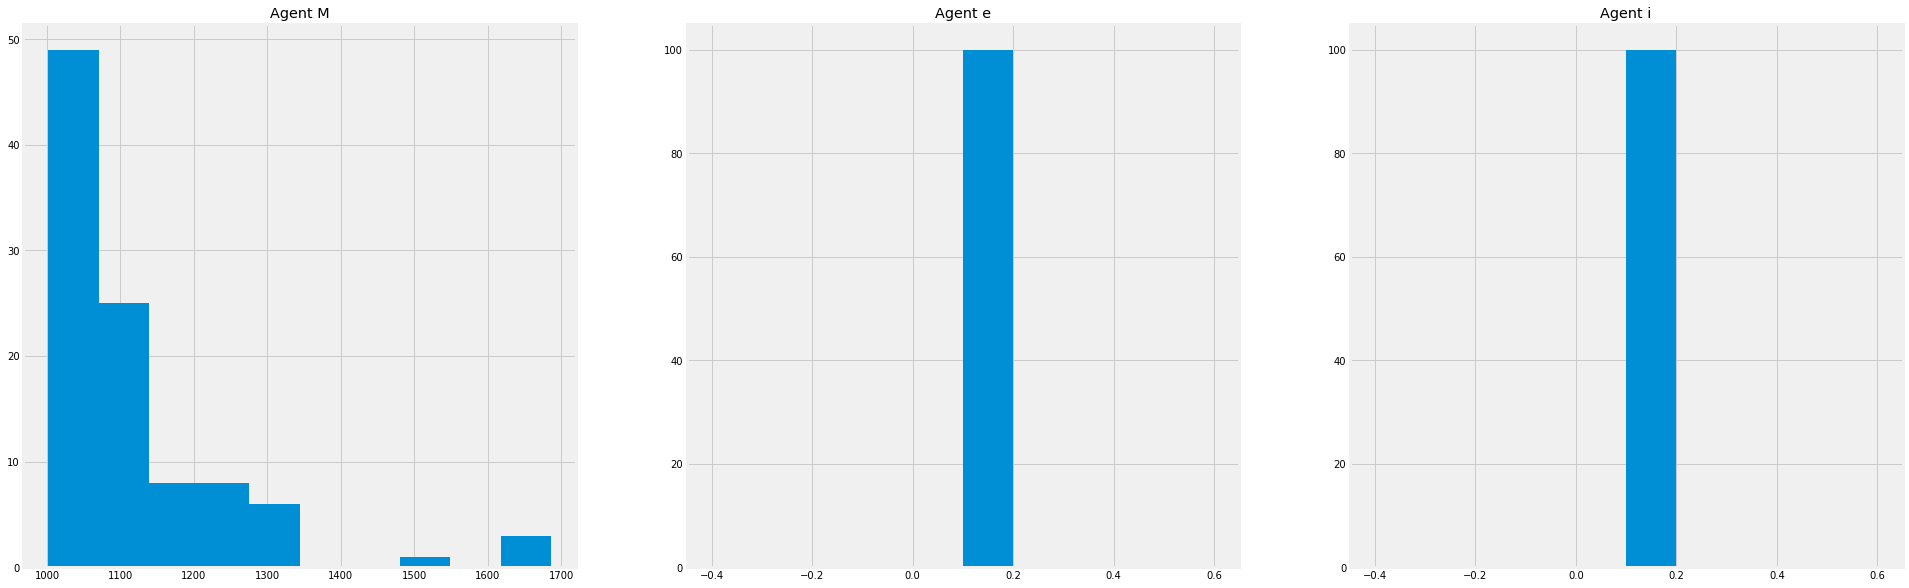

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 108.0, Temptation: 120.0, Sucker: -12.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 96.0, Temptation: 107.0, Sucker: -11.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 93.0, Temptation: 103.0, Sucker: -10.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 96.0, Temptation: 107.0, Sucker: -11.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 96.0, Temptation: 107.0, Sucker: -11.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 96.0, Temptation: 107.0, S

In [2]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = ["power",1000, 10]
E = [0.1, 1/10000]
I = [0.1, 1/10000]
power_distance = [M,E,I]

agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 41 minutes.
    S.D.  Counts Seed
0    0.5     285   16
1    0.6     303   16
2    0.7     287   16
3    0.8     243   16
4    0.9     226   16
5    1.0     188   16
6    1.1     161   16
7    1.2     132   16
8    1.3     123   16
9    1.4     107   16
10   1.5     100   16
11   1.6      78   16
12   1.7      78   16
13   1.8      58   16
14   1.9      50   16
15   2.0      45   16
16   2.1      36   16
17   2.2      24   16
18   2.3      16   16
19   2.4      11   16
20   2.5       6   16
21   2.6       3   16
22   2.7       2   16
23   2.8       1   16
24   2.9       1   16
25   3.0       1   16


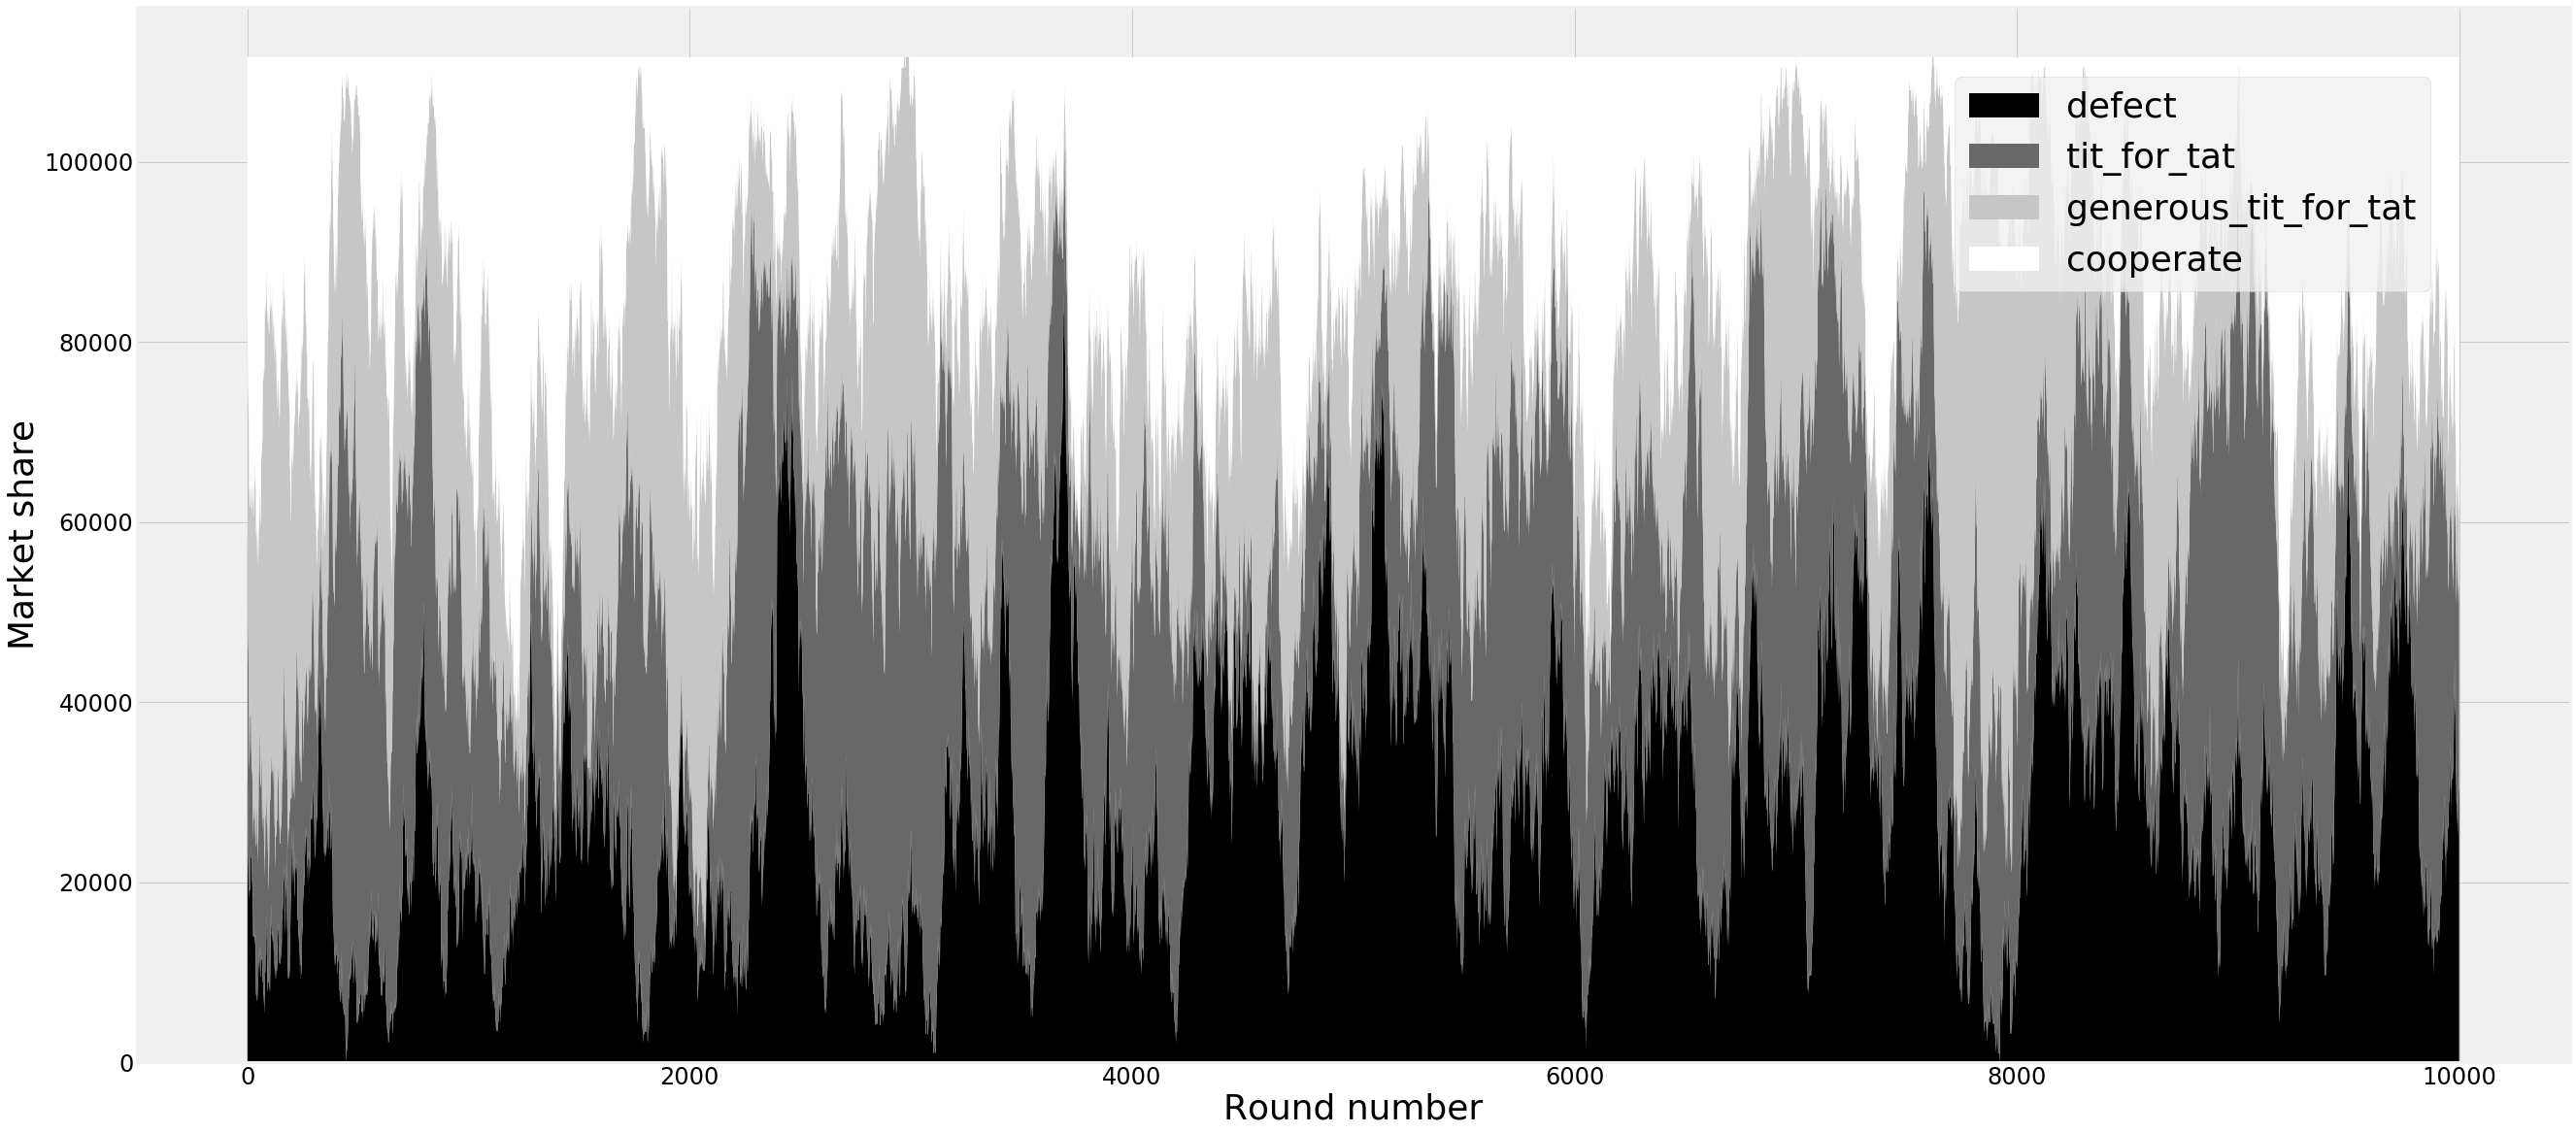

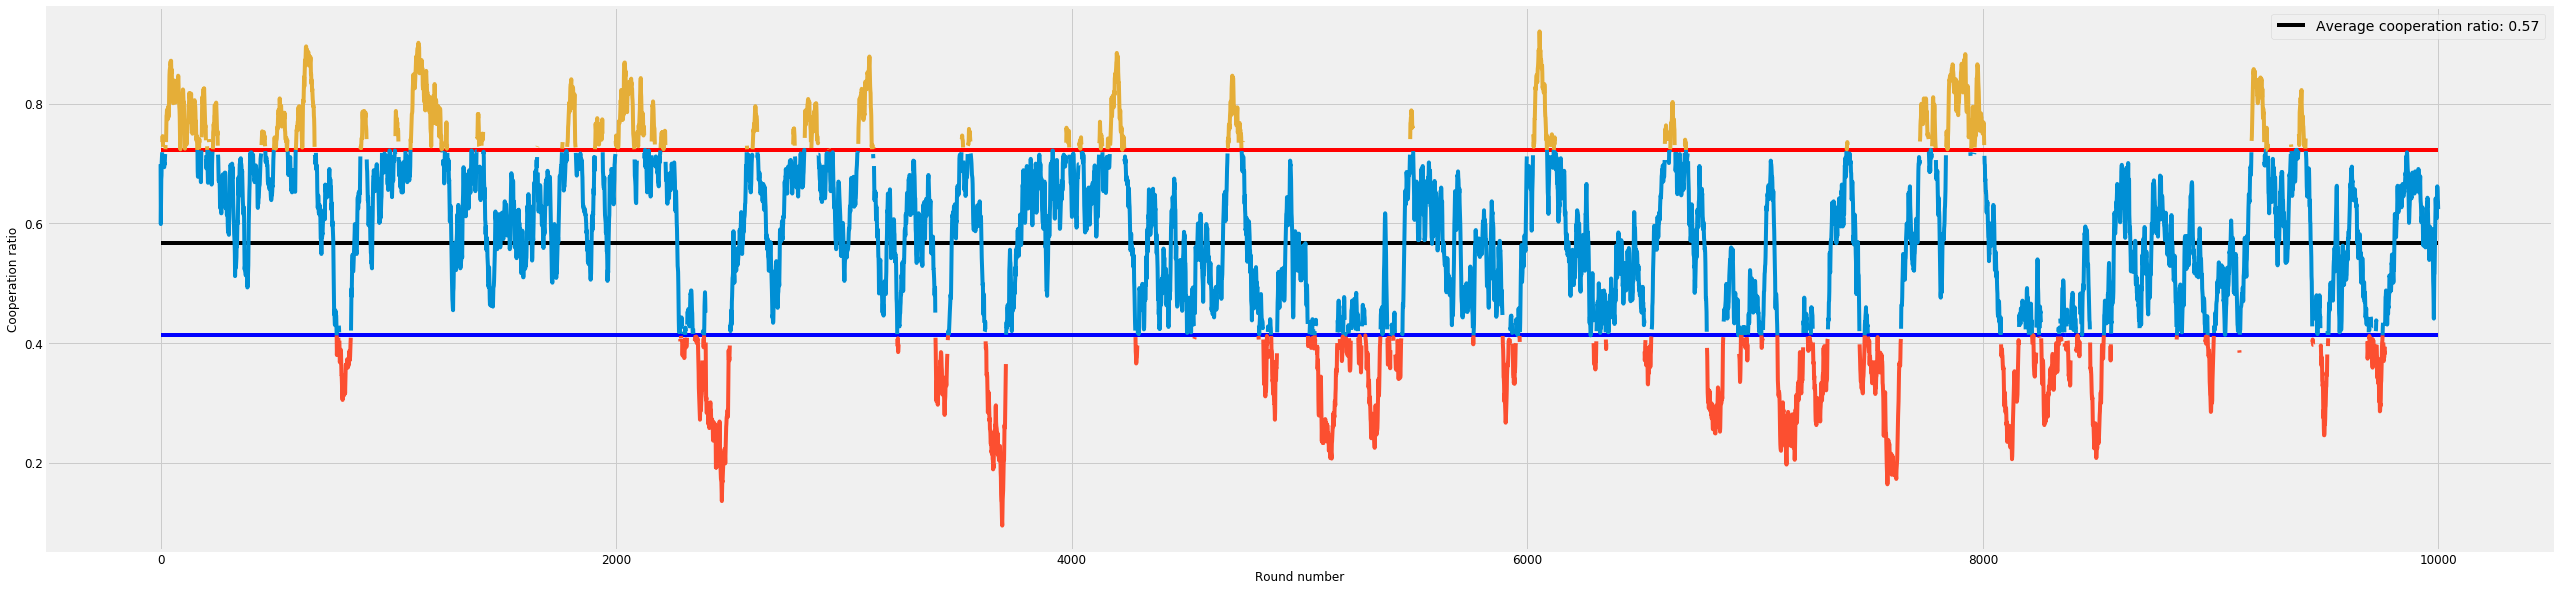

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_power_law_M", seed = str(seed))